# Characterization of Systems in the Spectral Domain

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Combination of Systems

The representation of complex systems as combination of simpler systems is often convenient for the analysis or synthesis. This section discusses three of the most common combinations, the series or parallel connection of systems as well as feedback loops.

### Concatenation

When two systems are combined in series by connecting the output of the first system to the input of a second system this is termed as *concatenation* of two systems. Denoting the impulse responses of the two systems as $h_1(t)$ and $h_2(t)$, the output signal $y(t)$ of the second system is given as

\begin{equation}
y(t) =  x(t) * h_1(t) * h_2(t)
\end{equation}

where $x(t)$ denotes the input signal of the first system. Laplace transformation of the respective signals and impulse responses, and repeated application of the convolution theorem yields

\begin{equation}
Y(s) = \underbrace{H_1(s) \cdot H_2(s)}_{H(s)} \cdot X(s)
\end{equation}

It can be concluded that the concatenation of two systems can be regarded as one system with the transfer function $H(s) = H_1(s) \cdot H_2(s)$. Hence, the following structures are equivalent

![Concatenation of two systems](concatenation.png)

The extension to a concatenation of $N$ systems is straightforward. The overall transfer function is given by multiplication of all the individual transfer functions $H_n(s)$

\begin{equation}
H(s) = \prod_{n=1}^{N} H_n(s)
\end{equation}

Applications of concatenated systems include for instance the modeling of wireless transmission systems and cascaded filters.

**Example**

Concatenation of LTI systems can be used to construct higher-order filters from lower-order prototypes. Such filters are known as *cascaded filters*. This is illustrated at the [example of the second-order low-pass filter](../laplace_transform/network_analysis.ipynb#Example:-Second-Order-Low-Pass-Filter) introduced before. The transfer function $H_0(s)$ of the low-pass is given as

\begin{equation}
H_0(s) = \frac{1}{LC s^2 + RC s + 1}
\end{equation}

where $R$, $L$ and $C$ denote the values of the resistor, capacitor and inductor. Concatenation of $N$ second-order filters leads to filter with order $2 N$. Its transfer function reads

\begin{equation}
H_N(s) = \left( \frac{1}{LC s^2 + RC s + 1} \right)^N
\end{equation}

The resulting transfer function is illustrated by its [Bode plot](../systems_spectral_domain/transfer_function.ipynb#Bode-Plots) for a varying number of cascaded filters using the normalized values $L = .5$, $R = 1$, $C = .4$. First the transfer function $H_N(s)$ is defined

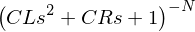

In [1]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
w, R, L, C = sym.symbols('omega R L C', real=True)
N = sym.symbols('N', integer=True)

H0 = 1/(L*C*s**2 + R*C*s + 1)
HN = H0**N
HN

The bode plot for the transfer function $H_N(j \omega)$ is shown for $N = \{1, 2, 3\}$ (red, green, blue line)

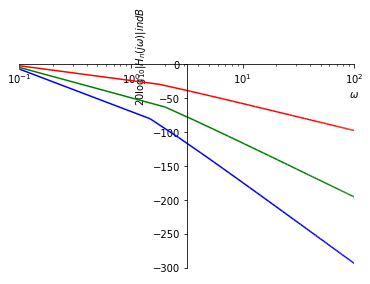

In [2]:
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}
HNlog = 20*sym.log(sym.Abs(HN.subs(RLC).subs(s, 2*sym.pi*w)), 10)

p1 = sym.plot(HNlog.subs(N, 1), (w, 0.1, 100), xscale='log', xlabel='$\omega$', ylabel='$20 \log_{10} | H_n(j \omega) | in dB$', line_color='r', show=False);
p2 = sym.plot(HNlog.subs(N, 2), (w, 0.1, 100), xscale='log', xlabel='$\omega$', ylabel='$20 \log_{10} | H_n(j \omega) | in dB$', line_color='g', show=False);
p3 = sym.plot(HNlog.subs(N, 3), (w, 0.1, 100), xscale='log', xlabel='$\omega$', ylabel='$20 \log_{10} | H_n(j \omega) | in dB$', line_color='b', show=False);
p1.extend(p2)
p1.extend(p3)
p1.show()

**Exercise**

* Derive the magnitude $|H(s)|$ and phase $\varphi(s)$ of a concatenated system.
* Using the result from the first exercise, how will the phase of the cascaded filter develop for an increasing number $N$ of cascaded filters. 

### Parallel Connection

A structure where two systems share the same input signal and the output signals are superimposed is called *parallel connection*. The overall output signal $y(t)$ is given as the superposition of the output signals of the individual systems

\begin{equation}
y(t) = h_1(t) * x(t) + h_2(t) * x(t)
\end{equation}

Laplace transformation of the respective signals and impulse responses, and application of the convolution theorem yields

\begin{equation}
Y(s) = \underbrace{\left( H_1(s) + H_2(s)  \right)}_{H(s)} \cdot X(s)
\end{equation}

The overall transfer function $H(s)$ of a parallel connection of two systems is given as the superposition of the transfer functions of the individual systems. Hence, the following structures are equivalent

![Parallel connection of two systems](parallel.png)

The extension to a parallel connection of $N$ systems is straightforward. The overall transfer function is given by superposition of all individual transfer functions $H_n(s)$

\begin{equation}
H(s) = \sum_{n=1}^{N} H_n(s)
\end{equation}

A prominent application of a parallel connection of systems are [filter banks](https://en.wikipedia.org/wiki/Filter_bank) as used in signal analysis and many lossy coding schemes.

### Feedback

The connection of two systems, where the input of the second system is connected to the output of the first and the output of the second system is superimposed to the input of the first is called *feedback loop*. This structure is depicted in the following illustration (upper block diagram)

![Two systems combined in a feedback loop](feedback.png)

The output signal $y(t)$ is given as

\begin{equation}
y(t) = x(t) * h_1(t) + y(t) * h_2(t) * h_1(t)
\end{equation}

Laplace transform of the signals and impulse responses, application of the convolution theorem and rearrangement of terms yields

\begin{equation}
Y(s) = \frac{H_1(s)}{1 - H_1(s) \cdot H_2(s)} \cdot X(s)
\end{equation}

The overall transfer function $H(s)$ of the feedback loop is then given as 

\begin{equation}
H(s) = \frac{H_1(s)}{1 - H_1(s) \cdot H_2(s)}
\end{equation}

This equivalence is depicted by the lower block diagram of above structure.

Applications of feedback loops include [control systems](https://en.wikipedia.org/wiki/Control_system) and the design of amplifiers.

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.